# Entrega 3 - Clasificadores (Naive Bayes, KNN)

### Grupo 07:
     - Renzo Gambone C.I. 5.155.486-4
     - Germán Ouviña C.I. 4.823.566-1
     - Leandro Rodríguez C.I 4.691.736-4


## 1. Introducción
***
### 1.1. Objetivo
***
El objetivo de esta tarea fue implementar clasificadores basados en dos tipos de aprendizaje: **aprendizaje bayesiano** y **aprendizaje basado en casos**. Más especificamente, los modelos utilizados fueron **bayes sencillo** y **k vecinos más cercanos** respectivamente. Una vez generados distintos clasificadores en base a ciertos parámetros, se evaluó la performance de los mismos utilizando distintos tipos de métrica y comparando dichas evaluaciones para determinar cual modelo se ajustó mejor a cada escenario. Como agregado, se compararon los resultados obtenidos con los resultados obtenidos en el laboratorio anterior.

En términos formales, los parámetros del problema se reducen a lo siguiente:
- **Tarea *T*:** Clasificar ejemplos siguiendo cierto formato.
- **Experiencia *E*:** Conjunto de datos con ejemplos ya clasificados siguiendo cierto formato.
- **Performance *P*:** Múltiples tipos de medidas (las cuales se profundizan en la sección 3).

### 1.2. Entrega
***
La entrega de esta tarea consta de dos grandes componentes:
- **Informe** en formato de Jupyter Notebook (este informe).
- **Programa** que permite entrenar clasificadores, evaluar su desempeño y clasificar nuevos ejemplos.

El objetivo del informe es centralizar la información relativa a la construcción de los distintos modelos, así como los datos obtenidos mediante pruebas realizadas con varias configuraciones paramétricas. Como agregado opcional, se adjuntan algunos scripts para ayudar a la lectura o probar en tiempo real ciertas funcionalidades.

Por otra parte, el programa ofrece una interfaz en consola que permite entrenar y evaluar clasificadores acorde a múltiples configuraciones paramétricas. También se incluyen todas las herramientas desarrolladas en la anterior entrega, pudiendo entrenar y evaluar modelos basados en árboles o bosques de decisión. Si bien todas estas herramientas fueron pensadas para uso del grupo, en el archivo *README.md* se adjunta una sencilla guía de como utilizarlas.

### 1.3. Formato
***
En las siguientes secciones se especifica el diseño de cada modelo, justificando la toma de decisiones a la hora de construirlos y detallando las estrategias o algoritmos que fueron implementados para la configuración paramétrica, junto a las métricas utilizadas en la evaluación. Luego, se detalla la metodología de experimentación y con la misma los resultados obtenidos para cada modelo y cada conjunto de datos, habiendo entrenado con distintas configuraciones paramétricas. Finalmente se agregan conclusiones respecto a los resultados obtenidos.

Como detalle importante, dado que la consigna de la actual entrega presenta varias similitudes con la de la entrega anterior, se reutilizaron varios conceptos. A continuación se realiza una breve descripción del contenido de cada sección, especificando aquellas subsecciones que reutilizan contenido (a las cuales se les agrega también un asterisco en el título), con el objetivo de facilitar una lectura que tenga en cuenta el informe anterior.

La sección 2 (**Diseño**) reutiliza los conceptos de **preprocesamiento** y **evaluación** de la entrega anterior. Con respecto al diseño de **modelos** y **algoritmos**, no se reutiliza nada al tratarse de modelos distintos.

La sección 3 (**Experimentación**) reutiliza la estructura de la tarea anterior, siguiendo una metodología similar. De todas formas, al tratarse de nuevos resultados, no se reutiliza más que la estructura de la tarea anterior. Además, se agregan nuevos scripts para facilitar la visualización de la información.

La sección 4 (**Conclusiones**) cuenta con una nueva lista de conclusiones extraídas de la realización de esta tarea, por lo que no comparte nada más que ciertas comparaciones con la tarea anterior.

## 2. Diseño
***
En esta sección se detallan las características del diseño utilizado para construir el modelo, se profundizan las estrategias y algoritmos empleados en la configuración paramétrica y se tratan otros puntos como el procesamiento previo al entrenamiento y la evaluación posterior al mismo.

### 2.1. Modelo
***
La consigna propone la utilización y comparación de dos tipos de modelos basados en distintos métodos de aprendizaje supervisado. A continuación, se especifican las características de cada uno:

**Notas:**
* No se ahonda en dichas descripciones puesto que son conceptos trabajados en el teórico.
* Se utiliza notación matemática para visualizar fácilmente la definición de cada modelo.

#### 2.1.1. Bayes sencillo (Naive Bayes)
***
Para este escenario uno de los modelos propuestos es el de **bayes sencillo** (a partir de ahora denominado **naive bayes** o **NB**), un modelo bayesiano que, al asumir independencia entre cada atributo del conjunto de datos, "simplifica" la interpretación de las frecuencias o **probabilidades** de los valores de cada atributo y permite utilizar el *Teorema de Bayes* para clasificar nuevos ejemplos con probabilidad.

Se definen más formalmente las siguientes nociones:
* $D =$ Conjunto de entrenamiento
* $C_D =$ Conjunto de posibles clasificaciones para $d \in D$
* $NB_D =$ Clasificador bayesiano generado en base a $D$
* Se representa una clasificación de un ejemplo $d \in D$ realizada por el clasificador bayesiano $NB_D$ como $NB_D(d) = (c, p) : c \in C_D$ y $p \in [0..1]$

#### 2.1.2. K vecinos más cercanos (KNN)
***
El otro modelo propuestos es el de **k vecinos más cercanos** (a partir de ahora denominado **KNN**), un modelo basados en casos, el cual representa el conjunto de datos como un espacio de **$n$ dimensiones** (siendo $n$ la cantidad de atributos) y clasifica nuevos ejemplos basandose en la clasificación de los $k$ vecinos más cercanos al ejemplo en cuestión, utilizando algún tipo de medida de distancia.

Se definen más formalmente las siguientes nociones:
* $D =$ Conjunto de entrenamiento
* $C_D =$ Conjunto de posibles clasificaciones para $d \in D$
* $KNN_{(D,k)} =$ Clasificador de KNN generado en base a $D$ y evaluando los $k$ vecinos más cercanos
* Se representa una clasificación de un ejemplo $d \in D$ realizada por el clasificador $KNN_{(D,k)}$ como $KNN_{(D,k)}(d) = (c, p) : c \in C_D$ y $p \in [0..1]$

Los detalles sobre los algoritmos de entrenamiento y clasificación utilizados por cada modelo se expanden en la sección 2.3.


### 2.2. Preprocesamiento (*)
***
Con los objetivos tanto de hacer viable como de mejorar la performance de entrenamiento, se realizaron ciertos cambios en el conjunto de datos a utilizar. A continuación, se listan los cambios realizados agrupandolos en base a motivación y área cambiada en el conjunto original.

**Notas:**
* Los cambios realizados en el conjunto de datos fueron hechos en memoria, sin modificar de forma alguna los archivos originales.
* Los cambios como *interpretación de atributos continuos*, *normalización de rangos*, etc. son inherentes a ciertos modelos y por lo tanto no se especifícan en esta sección, tratandose en la sección correspondiente a cada algoritmo.

#### 2.2.1. Optimización (Representación) (*)
***
La elección de la representación interna fue compleja, ya que se tuvo en cuenta tanto la performance como la facilidad a la hora de programar e interpretar el código. Siguiendo el ejemplo de la entrega anterior, se determinó la utilización del objeto **DataFrame** de la biblioteca *pandas*. Al principio trajo muchos problemas de performance (tanto en uso de memoria como en velocidad) pero al implementar técnicas ofrecidas por la biblioteca dichos problemas se palearon, generando eventualmente un uso de memoria reducido y un entrenamiento veloz.

#### 2.2.2. Estructura (Atributos) (*)
***
Originalmente se buscó mantener la estructura de atributos estática, con el fin de impactar lo menos posible en el entrenamiento y su posterior evaluación. No obstante, para el segundo conjunto de datos (detallado en la sección 2.4), fue necesario cambiar la estructura eliminando varios atributos y generando otros nuevos.

Más concretamente, el cambio realizado fue el proceso inverso al conocido como **one hot encoding**, ya que habia múltiples atributos que representaban "la idea" de un sólo atributo discreto. En múltiples problemas, la implementación de dicho algoritmo resulta de gran utilidad para mejorar el rendimiento tanto a nivel de performance como de clasificación, generando $x$ atributos binarios para $x$ posibles valores del atributo original. 

En el contexto de árboles de decisión, sucede lo opuesto: el aumento lineal en cantidad de atributos genera un aumento exponencial en el tamaño del árbol y en el tiempo de entrenamiento. Tomando esto en cuenta, se deshizo el **one hot encoding**, tratando a los atributos generados como continuos (este punto junto a sus implicancias son expandidos en las siguientes secciones).

### 2.3. Algoritmo
***
En la siguiente sección se centralizan todas las especificaciones relativas a los algoritmos empleados, tanto para entrenar como para clasificar.

**Notas:**
* Se separa la especificación para **NB** y **KNN**.
* Se hace referencia a puntos mencionados en secciones anteriores, sin entrar en detalle en lo que ya fue explicado.

#### 2.3.1. Especificación - Naive Bayes
***
Un clasificador **Naive Bayes** trabaja con **atributos discretos** y una **clasificación discreta**. En este aspecto, no difiere de los **árboles de decisión** utilizados en la anterior tarea. No obstante, tanto la forma de *entrenar* como de *clasificar* si difiere, ya que se fundamenta en otros principios.

Como se mencionó anteriormente, **Naive Bayes** es un modelo bayesiano, por lo que utiliza determina probabilidades en base al conjunto de entrenamiento y clasifica nuevos ejemplos sirviendose de las mismas y del *Teorema de Bayes*. Debido a esto, cuenta con sus propias particularidades y distintos parámetros a configurar.

A continuación se tratan dichas particularidades, así como el algoritmo de entrenamiento y el de clasificación.

##### 2.3.1.1. Algoritmo de entrenamiento
***
El algoritmo de entrenamiento implementado para **Naive Bayes** sigue las pautas del visto en el teórico. Se utilizan las siguientes nociones:

- $D$ representa el conjunto de ejemplos.
- $C_D$ representa el conjunto de clases en $D$.
- $A_D$ representa el conjunto de atributos en $D$.
- $f : D \rightarrow C_D : f(d) = c$ representa la función de clasificación para un ejemplo existente en $D$.
- $g_a : D \rightarrow Val(a) : g_a(d) = v$ representa la función que determina el valor del atributo $a$ para un ejemplo existente en $D$.
- $D_c = {d \in D : f(d) = c}$ representa el subconjunto de $D$ donde cada ejemplo es clasificado como clase $c$.
- $D_{a, v, c} = {d \in D : f(d) = c, g_a(d) = v}$ representa el subconjunto de $D$ donde cada ejemplo con valor $v$ en el atributo $a$ es clasificado como clase $c$.

En resumen, el algoritmo consiste en recorrer $D$ y para cada clase y cada posible valor de cada atributo, obtener las siguientes probabilidades:

- $\forall c \in C_D$, se calcula la siguiente probabilidad, la cual representa la frecuencia de clasificaciones con clase $c$ en $D$.

$$P(c) = \frac{|D_c|}{|D|}$$

- $\forall a \in A_D$ y $\forall v \in Val(a)$, se calcula la siguiente probabilidad, la cual representa la frecuencia de clasificaciones con clase $c$ en $D$ y que en sus ejemplos el atributo $a$ cuenta con el valor $v$. 

$$P(v|c) = \frac{|D_{a, v, c}|}{|D|}$$

Dichas probabilidades se almacenan en una estructura para utilizarse al momento de clasificar.

##### 2.3.1.2. Algoritmo de clasificación
***
El algoritmo de clasificación implementado para **Naive Bayes** sigue las pautas del visto en el teórico. Se utilizan las nociones definidas en el punto anterior.

En resumen, el algoritmo consiste en aplicar el *Teorema de Bayes* y calcular para cada clase $c \in C_D$ la probabilidad condicional de que, dado $D$, la clasificación del ejemplo en cuestión sea $c$. Como **Naive Bayes** se fundamenta en asumir que los valores de cada atributo son **independientes**, se utilizan las siguientes nociones:

- Sea $e$ el ejemplo a clasificar.
- Sea $v_i$ el valor del i-ésimo atributo en $e$
- $\forall c \in C_D$, se calcula la probabilidad de que el ejemplo $e$ sea de clase $c$, utilizando la siguiente fórmula:

$$P(e|c) = \prod_{i \in [1..|A_D|]} = P(v_i|c) * P(c)$$

- El clasificador toma la mayor de las probabilidades anteriormente calculadas y devuelve la clase correspondiente:

$$NB_D(e) = argmax_{c \in C_D} P(e|c)$$

##### 2.3.1.3. Interpretación de atributos continuos
***
A

- **Distribución normal:** A
- **Intervalos variables:** A

##### 2.3.1.4. Implementación de m-estimador
***
A

#### 2.3.2. Especificación - KNN
***
Un clasificador **KNN** trabaja con **atributos continuos** y una **clasificación discreta**. En este aspecto, difiere bastante de los **árboles de decisión** utilizados en la anterior tarea. Además de esto, cuenta con otra particularidad: la etapa de *entrenamiento* "no existe" en términos formales y cada clasificación se realiza utilizando el conjunto de datos completo.

Como se mencionó anteriormente, **KNN** es un modelo basado en casos, por lo que utiliza los ejemplos que se parezcan más al ejemplo a clasificar, según algún tipo de métrica 

A continuación se tratan dichas particularidades, así como el algoritmo de entrenamiento y el de clasificación.

##### 2.3.2.1. Algoritmo de entrenamiento
***
A

##### 2.3.2.2. Algoritmo de clasificación
***
A

##### 2.3.2.3. Estrategias de normalización
***
A

- **Norma euclídea:** A
- **Reescalamiento:** A
- **Estandarización:** A
- **Ninguna:** A

##### 2.3.2.4. Medidas de distancia
***
A

- **Distancia manhattan:** A
- **Distancia euclídea:** A
- **Distancia chebychev:** A

##### 2.3.2.5. Estructuras de almacenamiento
***
A

- **Conjunto de datos:** A
- **Árbol KDTree:** A

##### 2.3.2.6. Estrategias de votación
***
A

- **Votación general:** A
- **Votación ponderada:** A

### 2.4. Evaluación (*)
***
En la siguiente sección se centralizan todas las especificaciones relativas a la evaluación de los clasificadores entrenados.

#### 2.4.1. Conjuntos de evaluación (*)
***
Los dos conjuntos de datos a partir de los cuales se entrenó y evaluó los modelos son:
- [**Conjunto *Iris*:**](https://archive.ics.uci.edu/ml/datasets/iris) El cual clasifica plantas del genero Iris (de la tribu Irideae, perteneciente a la familia Iridaceae) según especie. Cuenta con **150 ejemplos**, **4 atributos** de carácter continuo y **3 clases posibles**.
- [**Conjunto *Covertype*:**](https://archive.ics.uci.edu/ml/datasets/Covertype) El cual clasifica terrenos de bosques según atributos cartográficos. Cuenta con **581012 ejemplos**, **54 atributos**, siendo 10 de carácter continuo y 44 de carácter binario (son el _one hot encoding_ de 2 atributos generando 4 y 40 atributos respectivamente) y **7 clases posibles**.

Cabe destacar que el conjunto *Iris* cuenta con una cantidad ínfima de ejemplos, mientras que el conjunto *CoverType* va hacia el otro extremo. Las implicancias de estos hechos se tratan en la sección 3.

#### 2.4.2. Métodos de evaluación (*)
***
Se experimentó utilizando dos estrategias de evaluación, siendo las mismas:
- **Validación 80/20** (denominada "normal" a partir de ahora)
- **Validación cruzada** con 10 particiones (denominada "cruzada" a partir de ahora)

Ambas estrategias subdividen el conjunto de datos $D$ en dos subconjuntos, $T, E \subset D$. El subconjunto $T$ se utiliza para entrenar al clasificador en cuestión, mientras que el subconjunto $E$ se utiliza para evaluar la eficacia del mismo. Esto se logra haciendo que el modelo entrenado clasifique los ejemplos del conjunto de evaluación $E$, comparando luego la clasificación original con la realizada. Dicha comparación se basa en distintas métricas, las cuales se tratan en la subsección siguiente.

Es importante destacar que, independiente al método de evaluación, el conjunto de datos $D$ original se mezcla de forma aleatoria antes de subdividirlo en $T$ y $E$. Esto es vital para evitar repetir siempre el mismo resultado en distintas evaluaciones.

Si, por ejemplo, $D$ estuviera ordenado de forma tal que los últimos ejemplos en él (los que corresponderían a $E$ al momento de hacer la partición) no agregan información nueva a $T$, entonces el desempeño del clasificador sería excelente, ya que con la información en $T$ podría clasificar perfectamente a $E$. Por otra parte, si sucede lo contrario, el desempeño sería mucho peor. En ambos casos, el resultado de la evaluación estaría sesgado. La mezcla al azar de $D$ se utiliza con el objetivo de mitigar este fenómeno.

A continuación se adjunta una breve descripción de los parámetros utilizados en cada método de evaluación.

##### 2.4.2.1. Validación normal (*)
***
Se denomina como **validación normal** a la partición única del conjunto $D$ en $T$ y $E$ utilizando una proporción donde $|T| \lt |E|$.

En general, dependiendo de la cantidad de ejemplos en $D$ y del objetivo que se quiera alcanzar, dicha partición sigue una relación 80/20, 85/15, 90/10, etc. Para el escenario actual, se determinó utilizar una partición 80/20, es decir, $T$ cuenta con el 80% de ejemplos en $D$, mientras que $E$ cuenta con el 20% restante.

Es importante recordar el fenómeno mencionado en la subsección anterior. La validación normal, si bien parte al conjunto luego de haber sido reordenado aleatoriamente, puede verse afectada, por casualidad, por el fenómeno en cuestión. Con el objetivo de reducir esta posibilidad, se agrega el siguiente método

##### 2.4.2.2. Validación cruzada (*)
***

Se denomina como **validación cruzada** a la partición del conjunto $D$ en $k$ particiones $T_i$ y $E_i : i \in [1..k]$,  utilizando una proporción de $\frac{k-1}{k}$ y $\frac{1}{k}$ ejemplos para $T_i$ y $E_i$ respectivamente.

En lenguaje natural, la validación cruzada utiliza un parámetro $k$, generando $k$ particiones de $D$ siguiendo el método normal mencionado en la anterior subsección. Esto se hace con el objetivo de evitar el sobreajuste en subconjuntos $T \subset D$ específicos. Una vez se hacen las $k$ evaluaciones, se promedian las métricas obtenidas para obtener una mejor noción del desempeño del modelo.

Esta estrategia es más robusta que la **validación normal** anteriormente mencionada, sin embargo tiene el problema de tener un mayor orden computacional, dado que tiene que correr $k$ entrenamientos en lugar de uno.

En la experimentación se decidió fijar $k=10$.

#### 2.4.3. Métricas de evaluación (*)
***
Se utilizaron múltiples métricas para determinar la "calidad" o "eficacia" de los clasificadores entrenados. A continuación, una breve descripción de las mismas:

##### 2.4.3.1 Accuracy (*)
***
La **accuracy** o **exactitud** hace referencia a la cantidad de aciertos que el clasificador tuvo en relación al total de clasificaciones que realizó durante la evaluación. Para definir **accuracy**, se utilizan las siguientes nociones:
- Sea $D$ el conjunto de datos, $C_D$ el conjunto de posibles clasificaciones en $D$ y $|C_D| = n$
- Sea $t_i : i \in [1..n]$ la cantidad de clasificaciones para la clase $i$ que fueron correctas
- Sea $f_i : i \in [1..n]$ la cantidad de clasificaciones para la clase $i$ que fueron incorrectas

$$ accuracy = \frac{\sum_{i=1}^{n} t_i}{\sum_{i=1}^{n} t_i + f_i}$$

Se observa que **accuracy** no es una muy buena medida de performance, ya que depende mucho del conjunto de datos que se evalúe, pudiendo dar buenos resultados a un clasificador malo. Teniendo esto en cuenta, se utilizó esta métrica solo para tener una noción general del desempeño de un clasificador, dandole más peso a las métricas definidas a continuación.

##### 2.4.3.2 Matriz de Confusión (*)
***
La **matriz de confusión** es una matriz que permite almacenar todas las clasificaciones realizadas en una evaluación, basándose en cada resultado y su respectivo valor original. La estructura de la matriz es la siguiente:

- Sea $D =$ Conjunto de datos
- Sea $C_D =$ Conjunto de clasificaciones para $d \in D$ 
- Sea $|C_D| = n$ cantidad de posibles clasificaciones en $C_D$
- Sea $M$ la matriz de confusión para una evaluación definida como:

$$M = \begin{bmatrix}
    x_{11} & x_{12} & \dots  & x_{1n} \\
    x_{21} & x_{22} & \dots  & x_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    x_{n1} & x_{n2} & \dots  & x_{nn}
\end{bmatrix}$$

- Entonces $x_{ij} \in M : i,j \in [1..n]$ representa la cantidad de clasificaciones que originalmente eran **clase $i$** y que fueron clasificadas en la evaluación como **clase $j$**.

De esta forma, en una matriz cuadrada de dimensión $n$, se pueden centralizar todas las clasificaciones realizadas y su relación con respecto a cada clase.

En sí misma, la matriz de confusión no representa una métrica sino una herramienta para calcular otras métricas, las cuales serán detalladas a continuación. De todas formas, una matriz de confusión de tamaño razonable puede aportar información general sobre el desempeño del clasificador, sólo con mirarla por arriba (en la siguiente subsección se detalla como).

##### 2.4.3.3 Precision, Recall, Fall-off, F-measure (*)
***
Existen cuatro medidas que, si bien siguen una fórmula similar a la de **accuracy**, son mucho menos sensibles al ruido en el conjunto de datos $D$, ya que operan **por clase**. Antes de detallar cada una, se repasan ciertas nociones básicas utilizadas en la definición de cada métrica.

Retomando el punto anterior, la matriz de confusión permite calcular para cada clase $c_i$, cuatro valores indispensables:
- Los **verdaderos positivos** en la clase $c_i$ (denotados como $t_i$), son aquellos ejemplos que originalmente son clase $c_i$ y fueron clasificados correctamente en la evaluación como clase $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la celda $M(i,i)$ para la clase $c_i$.

$$ t_i = M(i,i) $$

- Los **falsos positivos** en la clase $c_i$ (denotados como $f_i$), son aquellos ejemplos que originalmente son clase $c_j : j \neq i$ y fueron clasificados incorrectamente en la evaluación como clase $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la fila $M_{(i,)}$ para la clase $c_i$, y sumar todos sus valores (excepto la celda $M(i,i)$, que corresponde a los verdaderos positivos).

$$ f_i = \sum_{j=1, j \neq i}^{n} M(i,j) $$

- Los **verdaderos negativos** en la clase $c_i$ (denotados como $\bar{t_i}$), son aquellos ejemplos que originalmente no son clase $c_i$ y fueron clasificados en la evaluación como clase $c_j : j \neq i$. Cabe destacar que la clasificación como $c_j$ puede ser correcta o no, lo importante es que sea consistente en relación a $c_i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la matriz adjunta a los verdaderos positivos de $c_i$ y sumar todas sus entradas. Dicha matriz se define como $M_{ii}$ y contiene todas las entradas de $M$ excepto la fila $i$ y la columna $i$.

$$ \bar{t_i} = \sum_{j=1}^{n-1} \sum_{k=1}^{n-1} M_{ii}(j,k) $$

- Los **falsos negativos** en la clase $c_i$ (denotados como $\bar{f_i}$), son aquellos ejemplos que originalmente son clase $c_i$ y fueron clasificados incorrectamente en la evaluación como clase $c_j : j \neq i$. Para calcularlos utilizando la matriz de confusión, simplemente hay que tomar la columna $M_{(,i)}$ para la clase $c_i$, y sumar todos sus valores (excepto la celda $M(i,i)$, que corresponde a los verdaderos positivos).

$$ \bar{f_i} = \sum_{j=1, j \neq i}^{n} M(j,i) $$

Teniendo en cuenta dichas definiciones, se pasa a definir las métricas utilizadas:
- **Precision**
> - La **precision** o precisión de una **clase $c_i$** hace referencia a la cantidad de clasificaciones correctas para dicha clase, en relación a la cantidad de clasificaciones totales (correctas e incorrectas) para dicha clase.
> - La precision permite determinar "que tan bien se clasifica una clase". En otras palabras, que tan poco se equivoca el clasificador en marcar un ejemplo como cierta clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ precision(c_i) = \frac{t_i}{t_i + f_i}$$

- **Recall**
> - La **recall** o recuperación de una **clase $c_i$** hace referencia a la cantidad de clasificaciones correctas para dicha clase, en relación a la cantidad de clasificaciones originales para dicha clase.
> - La recall permite determinar "que tan bien se clasifican elementos de otras clases respecto a una clase". En otras palabras, que tan poco se equivoca el clasificador en marcar un ejemplo de otras clases como cierta clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ recall(c_i) = \frac{t_i}{t_i + \bar{f_i}}$$

- **Fall-off**
> - La **fall-off** de una **clase $c_i$** hace referencia a la cantidad de clasificaciones incorrectas para dicha clase, en relación a la cantidad de clasificaciones complemento (correctas e incorrectas) de dicha clase.
> - La fall-off permite determinar "que tan mal se clasifica una clase". En otras palabras, es la noción inversa de la recall: cuantos más ejemplos de otra clase sean clasificados como clase $c_i$, más aumenta fall-off.
> - Oscila entre 0 y 1, siendo mejor cuanto **menor** es.
> - Se calcula como:
> $$ falloff(c_i) = \frac{f_i}{f_i + \bar{t_i}}$$

- **F-measure**
> - La **F-measure** o medida-F de una **clase $c_i$** es una medida que relaciona **precision** y **recall**, oficiando de alguna forma como un representante de cierta clase.
> - La F-measure permite determinar "que tan bien se clasifica una clase y que tan poco se falla a la vez". En otras palabras, es una relación proporcional entre la precision y la recall y por tanto es una buena métrica para determinar el desempeño del clasificador respecto a una clase.
> - Oscila entre 0 y 1, siendo mejor cuanto **mayor** es.
> - Se calcula como:
> $$ Fmeasure(c_i) = \frac{2 precision(c_i) recall(c_i)}{precision(c_i) + recall(c_i)}$$

Si bien estas medidas ofrecen información más enriquecedora en comparación a las anteriormente mencionadas, cuentan con el "defecto" de aplicar por clase y no dar una medida general del clasificador. Para conjuntos $D$ con pocas clasificaciones en $C_D$ esto no es un gran problema, pero complica la comparación al aumentar la cantidad de clases. En la siguiente subsección se tratan métricas que tienen como objetivo mejorar este hecho.

##### 2.4.3.4 Medidas macro y micro (*)
***
Existen dos formas genéricas de establecer medidas representativas para un modelo sin importar la clase. En este escenario se implementaron ambas formas, siendo las siguientes:

- **Promedios genéricos** 
> - El promedio genérico de una métrica dada consiste en la suma de las métricas para cada clase dividida por la cantidad de clases.
> - Otorga una noción del desempeño general del clasificador en relación a la métrica dada. 
> - Sea $D$ el conjunto de datos
> - Sea $C_D$ el conjuntos de posibles clases
> - Sea $|C_D| = n$
> - El promedio genérico se calcula como:
> $$ metrica_{general} = \frac{\sum_{i=1}^{n} metrica(c_i)}{n}$$

- **Promedios ponderados:**
> - El promedio ponderado de una métrica dada consiste en la suma de las métricas para cada clase ponderada por la proporción de ejemplos en el conjunto de datos para dicha clase.
> - Otorga una noción del desempeño del clasificador en relación a la métrica dada, ignorando el ruido generado por mal desempeño en clases con menor cantidad de ejemplos (en otras palabras, es particularmente útil ante conjuntos de datos con una distribución nada uniforme en las clasificaciones de sus ejemplos).
> - Sea $D$ el conjunto de datos
> - Sea $C_D$ el conjuntos de posibles clases
> - Sea $|C_D| = n$
> - Sea $c_i \in C_D$ la i-ésima clase en $C_D$
> - Sea $D_i \subseteq D$ el conjunto de ejemplos clasificados con clase $c_i$
> - El promedio ponderado se calcula como:
> $$ metrica_{ponderada} = \sum_{i=1}^{n} metrica(c_i) * \frac{|D_i|}{|D|}$$


## 3. Experimentación
***
En esta sección se detalla el conjunto de pruebas realizadas, agregandose observaciones pertinentes y comparaciones entre modelos.

### 3.1. Metodología
***

Con el objetivo de evaluar las estrategias planteadas anteriormente y su efectividad, se probaron combinaciones de las mismas frente a los dos modelos desarrollados. La exprimentación se encaró diviendola en las siguientes etapas:

1. **Configuraciones paramétricas:** Luego de llegar a un modelo relativamente libre de errores (al menos de errores identificados), se realizaron pruebas para múltiples configuraciones paramétricas, con el fin de comparar cuales de ellas resultaron en mejores clasificadores. En esta etapa se detallan los datos obtenidos. 
<br><br>
2. **Elección y comparación de representantes:** A falta de suficientes corridas para generar agrupamientos de configuraciones, se compararon manualmente los resultados obtenidos en las pruebas de cada configuración paramétrica de la etapa anterior. En base a distintas métricas, se eligió a aquellos clasificadores con mejores y peores resultados, interpretando la razón de su eficacia.
<br><br>
3. **Comparación final:** Una vez obtenidos los representantes para cada modelo, se comparó su rendimiento con los representantes obtenidos en la tarea anterior, realizando distintas observaciones en base a la comparación en cuestión.
<br><br> 
4. **Pruebas extra:** Para cerrar, se generaron nuevas evaluaciones para los representantes cambiando ciertos parámetros, con el objetivo de determinar si dichos cambios incidieron de alguna forma (ya sea positiva o negativa) en el rendimiento.

### 3.2. Configuraciones paramétricas
***
A continuación se adjuntan las distintas configuraciones paramétricas utilizadas al evaluar, sus motivaciones y sus resultados. Se realizan pequeñas observaciones sobre los mismos, quedando el análisis exhaustivo pendiente para la siguiente sección.

#### 3.2.1. Evaluaciones
***

Debido a que los tiempos de entrenamiento y evaluación fueron notablemente mejores que en la anterior tarea, se lograron generar evaluaciones cruzadas para *CoverType*, aumentando la cantidad de evaluaciones totales realizadas.

En una primera instancia, se realizaron un total de **234 evaluaciones**, de las cuales **72** corresponden a **Naive Bayes** y **164** a **KNN**. Las mismas se distribuyen según los siguientes parámetros:

- Evaluaciones en **Naive Bayes**:
> - Conjunto de datos utilizado (2 opciones: *Iris*, *CoverType*)
> - Tipo de evaluación utilizada (2 opciones: **Normal**, **Cruzada**)
> - Utilización de *one hot encoding* (2 opciones: **Si**, **No**)
> - Estrategia de atributos continuos utilizada (2 opciones: **Distribución normal**, **Intervalos variables**)
> - Valor de m-estimador utilizado (5 opciones: **0, 0.01, 0.5, 1, 100**)

- Evaluaciones en **KNN**:
> - Conjunto de datos utilizado (2 opciones: *Iris*, *CoverType*)
> - Tipo de evaluación utilizada (2 opciones: **Normal**, **Cruzada**)
> - Utilización de *one hot encoding* (2 opciones: **Si**, **No**)
> - Cantidad de vecinos evaluada (3 opciones: **1, 3, 7**)
> - Medida de distancia utilizada (3 opciones: **Manhattan**, **Euclídea**, **Chebychev**)
> - Estrategia de normalización utilizada (3 opciones: **Euclídea**, **Reescalamiento**, **Estandarización**)

Cabe destacar que en el conjunto de datos *Iris* no hay atributos utilizando *one hot encoding* por lo que no se implementó distintas estrategias en ese caso, reduciendo la cantidad de evaluaciones a la mitad (en comparación a la cantidad de evaluaciones para *CoverType*).

También es importante mencionar que para los datos generados con **KNN** no se utilizaron ciertas configuraciones paramétricas. De hecho, en *CoverType*, siempre se utilizó una estructura de KDTree, debido al gran tamaño del conjunto de datos. En cambio en *Iris*, se utilizó la estructura tradicional. Por otra parte, siempre se utilizaron estrategias de normalización y como votación nunca se utilizó la ponderada. En la sección 3.5 se prueban dichos cambios utilizando un subconjunto de configuraciones paramétricas.

De esta forma, se generaron **24** y **48** evaluaciones para **Naive Bayes** en *Iris* y *CoverType* respectivamente, y **54** y **108** evaluaciones para **KNN** en *Iris* y *CoverType* respectivamente.

#### 3.2.2. Resultados
***
A continuación se adjuntan los resultados de dichos entrenamientos y sus respectivas evaluaciones.

##### 3.2.2.1. Resultados por clasificador
***
Con el objetivo de facilitar la lectura, se desarrolló un *script* que permite seleccionar cualquiera de las **234 evaluaciones** realizadas y obtener todas las métricas calculadas. Sumado a esto, se agregan las evaluaciones correspondientes a la anterior entrega.

**Notas:**
- Para las validaciones cruzadas no se adjunta matriz de confusión, ya que se muestran las métricas promediadas en base a la cantidad de particiones y no las métricas de cada partición.

In [1]:
import getConfusionMatrix.py

Box(children=(Box(children=(Dropdown(options=('Conjunto: Iris', 'Conjunto: Covertype'), value='Conjunto: Iris'…

Accuracy,Precision promediada,Recall promediada,Fall-off promediada,F-Measure promediada
0.8666666666666667,0.8974358974358975,0.861111111111111,0.06349206349206349,0.8582345191040842


Precision ponderada,Recall ponderada,Fall-off ponderada,F-Measure ponderada
0.9076923076923078,0.8666666666666667,0.057142857142857134,0.8680632411067193


X,Setosa,Versicolor,Virginica
-3,11,1,0
-2,0,9,0
-1,0,3,6


X,Precision,Recall,Fall-off,F-Measure
Setosa,1.0,0.9166666666666666,0.0,0.9565217391304348
Versicolor,0.6923076923076923,1.0,0.19047619047619047,0.8181818181818181
Virginica,1.0,0.6666666666666666,0.0,0.8


##### 3.2.2.2. Resultados generales
***
Con el objetivo de facilitar la lectura, se desarrollaron un *script* que permite filtrar los resultados de las evaluaciones según 3 parámetros: **modelo**, **conjunto de datos**, **estrategia de evaluación**. Una vez filtrados, se muestra una tabla comparativa de las métricas obtenidas, así como una gráfica de barras que permite comparar rápidamente distintas configuraciones paramétricas según dos métricas: **F-measure ponderada** y **Fall-off ponderada**.

Box(children=(Box(children=(Dropdown(index=1, options=('Conjunto: Iris', 'Conjunto: Covertype'), value='Conjun…

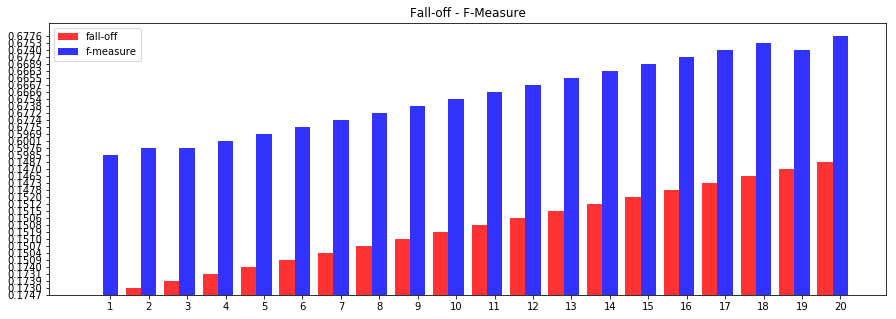

Indice,Onehot,Continuos,mEst,|,Accuracy,Precisión promediada,Precisión ponderada,Recall promediado,Recall ponderado,Fall-off promediado,Fall-off ponderado,F-Measure promediada,F-Measure ponderado
1,No,Standarization,0.0,|,0.6109,0.4701,0.6399,0.4579,0.6109,0.0737,0.1747,0.4415,0.5985
2,No,Standarization,0.01,|,0.6101,0.4633,0.6392,0.4564,0.6101,0.0736,0.1730,0.4370,0.5976
3,No,Standarization,0.5,|,0.6101,0.4658,0.6392,0.4598,0.6101,0.0737,0.1739,0.4393,0.5976
4,No,Standarization,1.0,|,0.6126,0.4553,0.6396,0.4523,0.6126,0.0732,0.1731,0.4300,0.6001
5,No,Standarization,100.0,|,0.6092,0.4553,0.6376,0.4544,0.6092,0.0738,0.1740,0.4311,0.5969
6,No,Variable,0.0,|,0.6749,0.5094,0.6822,0.5752,0.6749,0.0614,0.1509,0.5364,0.6775
7,No,Variable,0.01,|,0.6746,0.5129,0.6826,0.5810,0.6746,0.0614,0.1504,0.5409,0.6774
8,No,Variable,0.5,|,0.6749,0.5160,0.6817,0.5772,0.6749,0.0614,0.1507,0.5418,0.6772
9,No,Variable,1.0,|,0.6712,0.5130,0.6787,0.5762,0.6712,0.0618,0.1510,0.5397,0.6738
10,No,Variable,100.0,|,0.6730,0.5174,0.6797,0.5677,0.6730,0.0617,0.1519,0.5388,0.6754


In [2]:
import getTables.py

### 3.3. Elección y comparación de representantes
***
A continuación se presenta un análisis de los resultados obtenidos, separandose en dos procesos: elección y comparación.

#### 3.3.1. Elección
***
Para determinar cuales fueron los clasificadores con mejor desempeño (denominados "representantes") frente a los posibles candidatos se siguió el siguiente proceso:
1. Utilizando el script de comparación con tablas y gráficas, se eligió aquellas configuraciones paramétricas con mejores métricas (en resumen, tomar aquellas con mayor **F-measure** y menor **Fall-off**) .
2. Para cada grupo con mejores métricas se evaluó manualmente cada configuración, comprobando todas sus métricas y buscando alguna anomalía (positiva o negativa) dentro del grupo en cuestión.
3. Para aquellos grupos con métricas similares y sin anomalías se eligió un representante de forma pseudoaleatoria (es decir, al azar pero teniendo ciertas consideraciones). Por otra parte, para aquellos grupos con métricas similares donde se detectó que alguna configuración contaba con mejores métricas en cierto aspecto, se tomó dicha configuración como representante.

De esta forma, se determinó que los representantes son los siguientes:

- Para **Naive Bayes**:
    - A
    - A
    - A


- Para **KNN**:
    - A
    - A
    - A

#### 3.3.2. Comparación
***

**Observaciones generales:**

- Sobre los parámetros:
> 1. A
> 2. A

- Sobre los resultados:
> 1. A
> 2. A

**Interpretaciones:**

- Sobre los parámetros:
> 1. A

- Sobre los resultados:
> 1. A

### 3.4. Comparación final
***
A

### 3.5. Pruebas extra
***
A

## 4. Conclusiones
***

#### 4.1. Respecto a los Modelos
***
A

#### 4.2. Respecto a los Atributos
***
A

#### 4.3. Respecto a los Parámetros
***
A

#### 4.4. Respecto a los Resultados
***
A

#### 4.5. Posibles mejoras
***
Para cerrar, se adjunta una lista de mejoras consideradas a la implementación actual:
- A
- A
